In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import silhouette_score,adjusted_rand_score
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

### 1. Loading the data

In [2]:
data = pd.read_csv("HR_Employee_Data.csv")

In [3]:
data.head()

,EmployeeID,Age,Resigned,BusinessTravel,BusinessUnit,EducationLevel,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,...,PercentSalaryHike,PerformanceRating,AverageWeeklyHoursWorked,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInRole,YearsSinceLastPromotion,YearsWithCurrManager
0,2824,41,Yes,Travel_Rarely,Sales,2,Female,4,Single,5993,...,11,3,63.0,8,0,1,6,4,0,5
1,1409,49,No,Travel_Frequently,Consultants,1,Male,2,Married,5130,...,23,4,40.0,10,3,3,10,7,1,7
2,5506,37,Yes,Travel_Rarely,Consultants,2,Male,3,Single,2090,...,15,3,50.0,7,3,3,0,0,0,0
3,5012,33,No,Travel_Frequently,Consultants,4,Female,3,Married,2909,...,11,3,48.0,8,3,3,8,7,3,0
4,4657,27,No,Travel_Rarely,Consultants,1,Male,2,Married,3468,...,12,3,40.0,6,3,3,2,2,2,2


### 2. Analyse and visualise the data

Text(0.5, 0, 'Resigned')

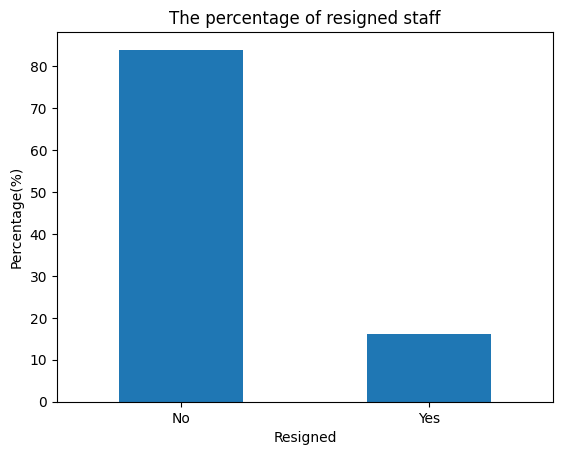

In [4]:
# Figure 1
((data['Resigned'].value_counts().div(data['Resigned'].count()))*100).plot(kind='bar', rot=0, title='The percentage of resigned staff')
plt.ylabel('Percentage(%)') 
plt.xlabel('Resigned') 
#plt.savefig('Resigned.jpg')

Text(0.5, 0, 'Over Time')

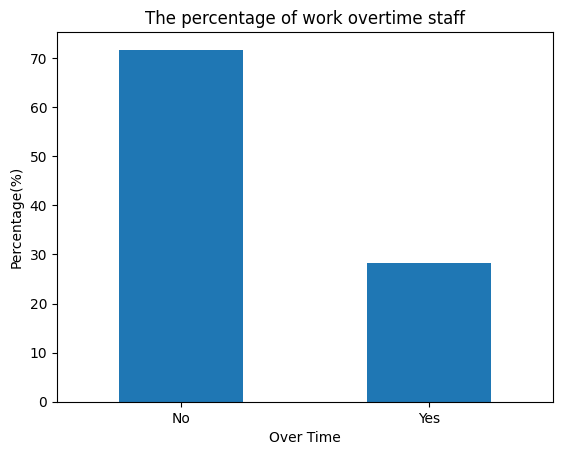

In [5]:
# Figure 2
((data['OverTime'].value_counts().div(data['OverTime'].count()))*100).plot(kind='bar', rot=0, title='The percentage of work overtime staff') 
plt.ylabel('Percentage(%)') 
plt.xlabel('Over Time') 
#plt.savefig('OverTime.jpg')

Text(0, 0.5, 'Count')

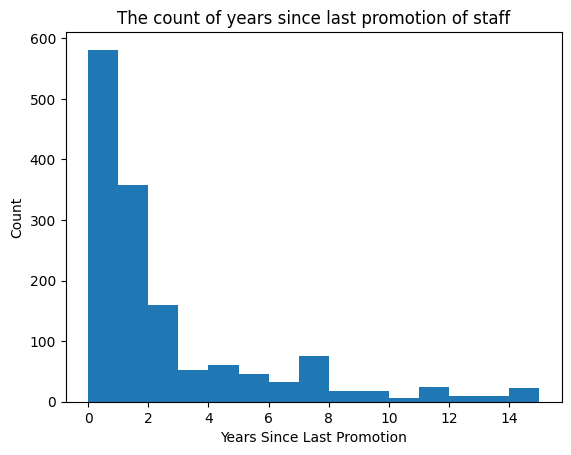

In [6]:
# Figure 3
data['YearsSinceLastPromotion'].plot(kind='hist',bins=15,title='The count of years since last promotion of staff') 
plt.xlabel('Years Since Last Promotion')
plt.ylabel('Count')
#plt.savefig('YearsSinceLastPromotion.jpg')

Text(0, 0.5, 'Count')

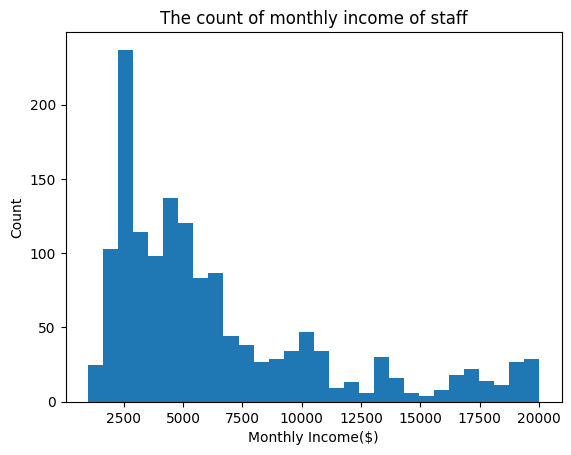

In [7]:
# Figure 4
data['MonthlyIncome'].plot(kind='hist',bins=30,title='The count of monthly income of staff')  
plt.xlabel('Monthly Income($)') 
plt.ylabel('Count')
#plt.savefig('MonthlyIncome.jpg')

Text(0, 0.5, 'Age')

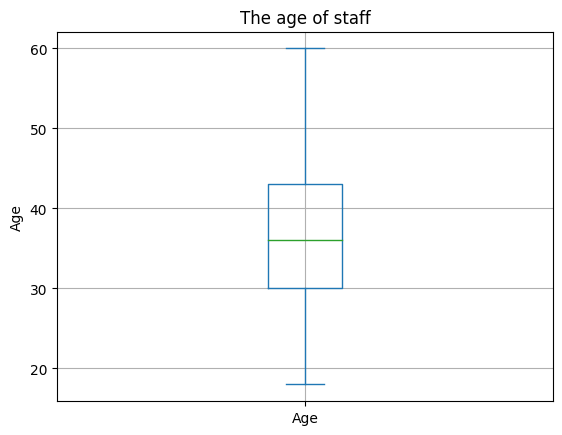

In [8]:
# Figure 5
data['Age'].plot(kind='box',title='The age of staff') 
plt.grid() 
plt.ylabel('Age') 
#plt.savefig('Age.jpg')

Text(0.5, 0, 'Education Level')

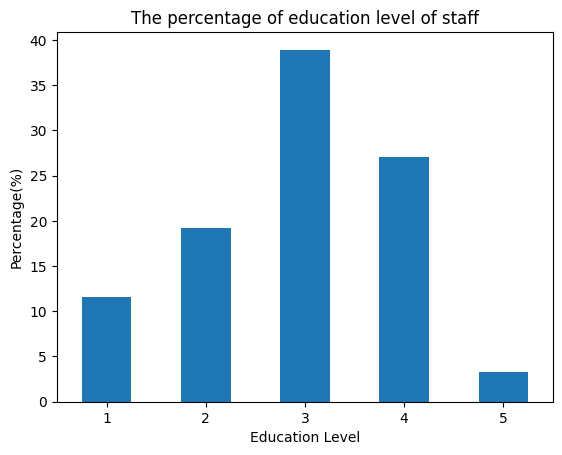

In [9]:
# Figure 6
((data['EducationLevel'].value_counts().div(data['EducationLevel'].count()))*100).sort_index().plot(kind='bar', rot=0, title='The percentage of education level of staff') 
plt.ylabel('Percentage(%)') 
plt.xlabel('Education Level') 
#plt.savefig('EducationLevel.jpg')

Text(0, 0.5, 'Count')

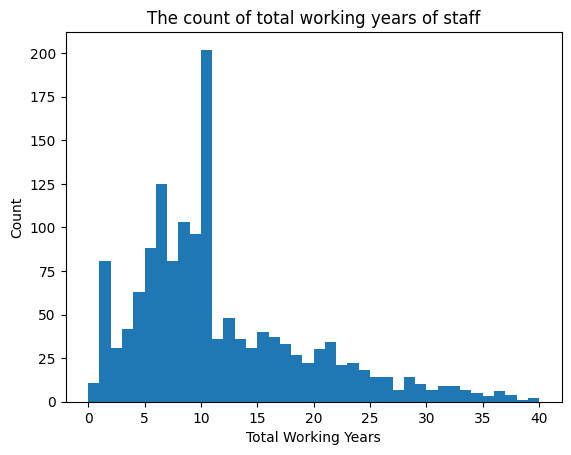

In [10]:
# Figure 7
data['TotalWorkingYears'].plot(kind='hist',bins=40,  title='The count of total working years of staff') 
plt.xlabel('Total Working Years') 
plt.ylabel('Count')
#plt.savefig('TotalWorkingYears.jpg')

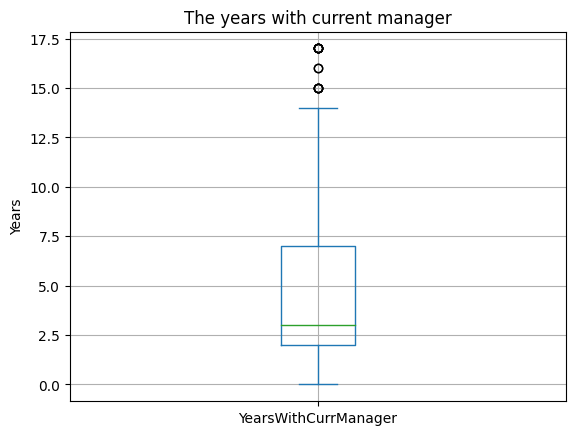

In [11]:
# Figure 8
data['YearsWithCurrManager'].plot(kind='box',title='The years with current manager') 
plt.grid()
plt.ylabel('Years')
#plt.savefig('YearsWithCurrManager.jpg')
plt.show()

Text(0, 0.5, 'Count')

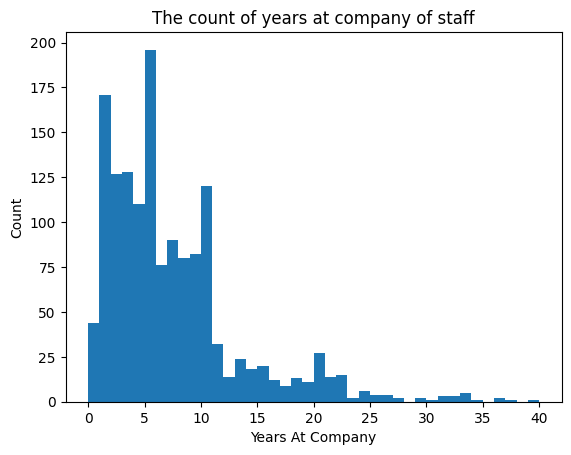

In [12]:
# Figure 9
data['YearsAtCompany'].plot(kind='hist',bins=40 ,title='The count of years at company of staff') 
plt.xlabel('Years At Company') 
plt.ylabel('Count')
#plt.savefig('YearsAtCompany.jpg')

Text(0, 0.5, 'Percentage(%)')

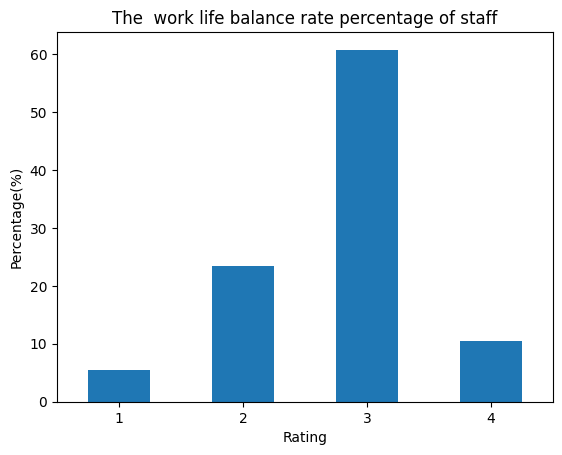

In [13]:
# Figure 10
((data['WorkLifeBalance'].value_counts().div(data['WorkLifeBalance'].count()))*100).sort_index().plot(kind='bar', rot=0, title='The  work life balance rate percentage of staff')
plt.xlabel('Rating') 
plt.ylabel('Percentage(%)')
#plt.savefig('WorkLifeBalance.jpg')

Text(0, 0.5, 'Percentage(%)')

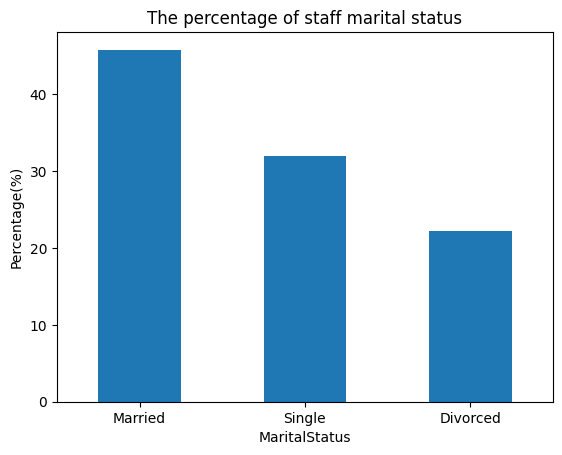

In [14]:
# Figure 11
((data['MaritalStatus'].value_counts().div(data['MaritalStatus'].count()))*100).plot(kind='bar', rot=0, title='The percentage of staff marital status')
plt.xlabel('MaritalStatus') 
plt.ylabel('Percentage(%)')
#plt.savefig('MaritalStatus.jpg')

Text(0, 0.5, 'Percentage(%)')

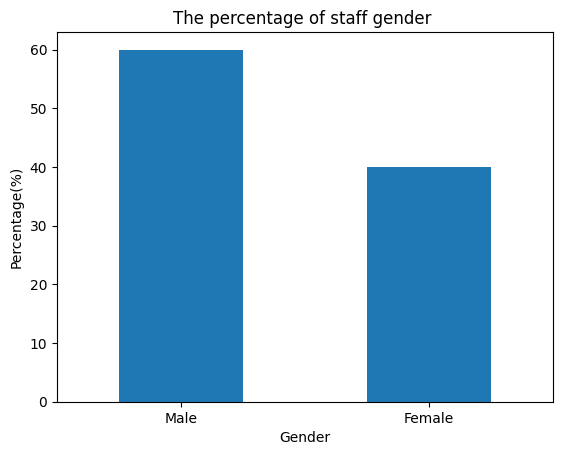

In [15]:
# Figure 12
((data['Gender'].value_counts().div(data['Gender'].count()))*100).plot(kind='bar', rot=0, title='The percentage of staff gender ') 
plt.xlabel('Gender') 
plt.ylabel('Percentage(%)')
#plt.savefig('Gender.jpg')

Text(0, 0.5, 'Percentage(%)')

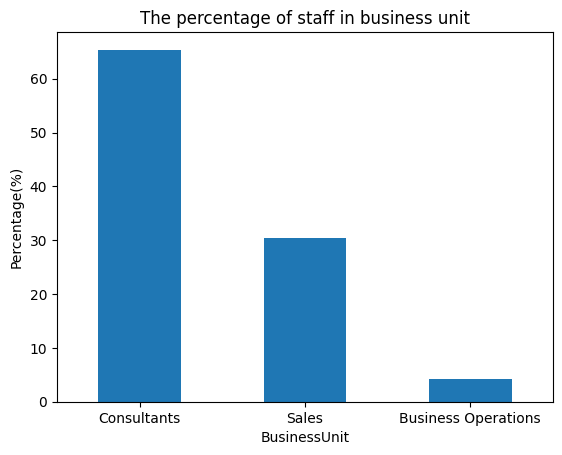

In [16]:
# Figure 13
((data['BusinessUnit'].value_counts().div(data['BusinessUnit'].count()))*100).plot(kind='bar', rot=0, title='The percentage of staff in business unit') 
plt.xlabel('BusinessUnit') 
plt.ylabel('Percentage(%)')
#plt.savefig('BusinessUnit.jpg')

### 3. Data Preprocessing

In [17]:
# Converting String data to number
fixed = pd.get_dummies(data, columns=['Resigned','Gender','OverTime'])
# Removing extra half chance and EmployeeID column 
fixed = fixed.drop(columns=['Resigned_No','Gender_Female','OverTime_No','EmployeeID'])
# Converting String data to number
fixed['BusinessTravel'].replace('Non-Travel',0,inplace= True)
fixed['BusinessTravel'].replace('Travel_Rarely',1,inplace= True)
fixed['BusinessTravel'].replace('Travel_Frequently',2,inplace= True)
fixed['BusinessUnit'].replace('Consultants',1,inplace= True)
fixed['BusinessUnit'].replace('Sales',2,inplace= True)
fixed['BusinessUnit'].replace('Business Operations',3,inplace= True)
fixed['MaritalStatus'].replace('Single',1,inplace= True)
fixed['MaritalStatus'].replace('Married',2,inplace= True)
fixed['MaritalStatus'].replace('Divorced',3,inplace= True)
fixed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   BusinessTravel            1470 non-null   int64  
 2   BusinessUnit              1470 non-null   int64  
 3   EducationLevel            1470 non-null   int64  
 4   JobSatisfaction           1470 non-null   int64  
 5   MaritalStatus             1470 non-null   int64  
 6   MonthlyIncome             1470 non-null   int64  
 7   NumCompaniesWorked        1470 non-null   int64  
 8   PercentSalaryHike         1470 non-null   int64  
 9   PerformanceRating         1470 non-null   int64  
 10  AverageWeeklyHoursWorked  1470 non-null   float64
 11  TotalWorkingYears         1470 non-null   int64  
 12  TrainingTimesLastYear     1470 non-null   int64  
 13  WorkLifeBalance           1470 non-null   int64  
 14  YearsAtC

In [18]:
# Elbow method
def plot_elbow_graph(dataset, k_range=range(2, 11)): 
    # Store inertia values for each k
    inertia_lst = [] 

    for k in k_range: 
        km_model = KMeans(n_clusters=k, random_state=42) 
        km_model.fit(dataset) 
        inertia_lst.append(km_model.inertia_) 

    # Plot the elbow graph
    plt.figure(figsize=(10,6)) 
    plt.plot(list(k_range), inertia_lst, marker='o', linestyle='-')
    plt.xticks(list(k_range)[::2])  # Reduce x-axis clutter if needed
    plt.title("The relationship between inertia and number of clusters")
    plt.xlabel("Number of Clusters") 
    plt.ylabel("Inertia") 
    plt.grid(True)  # Optional: Add grid for clarity
    plt.show()

In [19]:
# Silhouette score
def plot_silhouette_graph(dataset, k_range=range(2, 11)): 

    silhouette_coefficients = [] 

    for k in k_range: 
        km_model = KMeans(n_clusters=k, random_state=42) 
        km_model.fit(dataset) 
        score = silhouette_score(dataset, km_model.labels_) 
        silhouette_coefficients.append(score) 

    plt.figure(figsize=(10,6)) 
    plt.plot(k_range, silhouette_coefficients) 
    plt.title(f"The relationship between silhouette coefficient and number of clusters ")
    plt.xticks(k_range) 
    plt.xlabel("Number of Clusters") 
    plt.ylabel("Silhouette Coefficient") 
    plt.show()

In [20]:
# K distance graph
def plot_KTHneighbors (data,min_samples):
    min_samples = min_samples
    nbrs = NearestNeighbors(n_neighbors=20)
    nbrs.fit(data)
    distances, indices = nbrs.kneighbors(fixed)
    k_distance = distances[:,  min_samples-1] 
    k_distance = np.sort(k_distance) 
    plt.figure(figsize=(10,6)) 
    plt.plot(k_distance)
    plt.title(f"{min_samples}-distance graph for the dataset")
    plt.ylabel("$\epsilon$ distance")
    plt.xlabel("number of core points")
    plt.gca().invert_xaxis() 
    plt.grid(True) 
    plt.show()

### 4. Model evlation plot

In [21]:
# Input the dataset
data = fixed

c:\Users\Ronald\anaconda3\envs\Master\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\Ronald\anaconda3\envs\Master\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\Ronald\anaconda3\envs\Master\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\Ronald\anaconda3\envs\Master\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarn

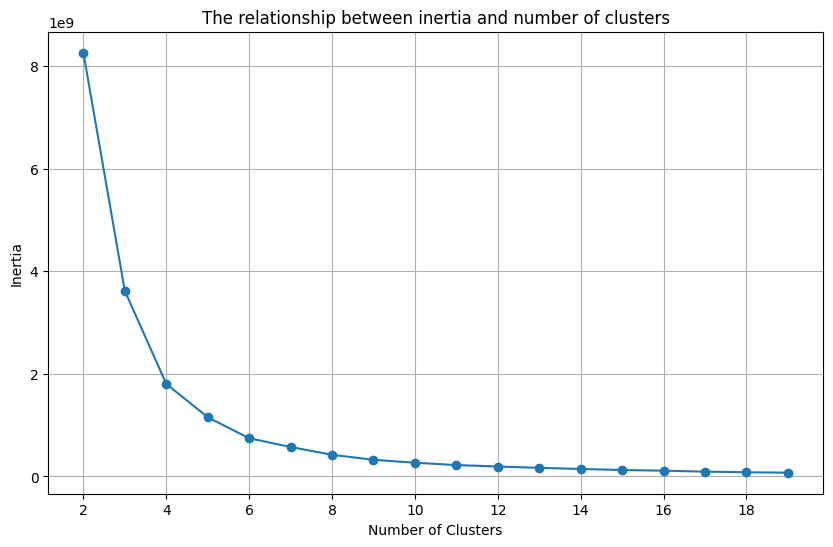

In [24]:
# Elbow method
# Figure 14
plot_elbow_graph(data, k_range=range(2,20))

c:\Users\Ronald\anaconda3\envs\Master\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Ronald\anaconda3\envs\Master\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\Ronald\anaconda3\envs\Master\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Ronald\anaconda3\envs\Master\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to ha

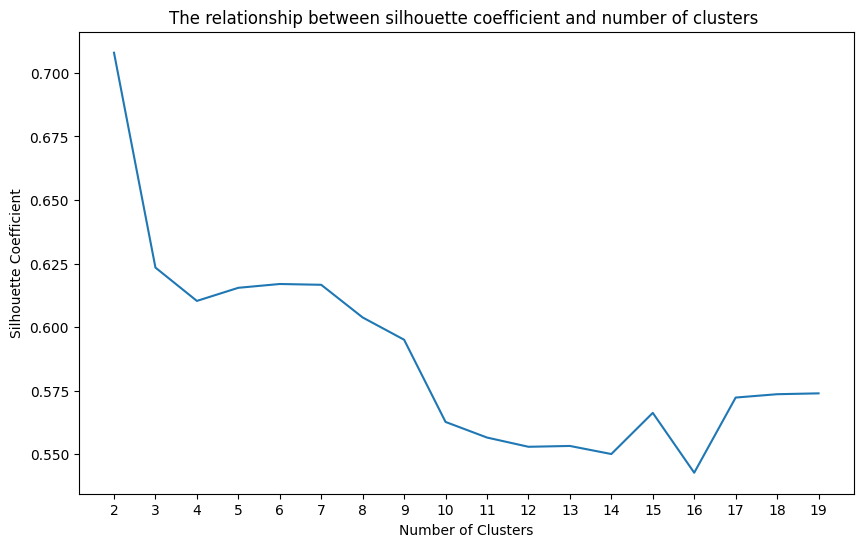

In [26]:
# Silhouette score
# Figure 15
plot_silhouette_graph(data, k_range=range(2,20))

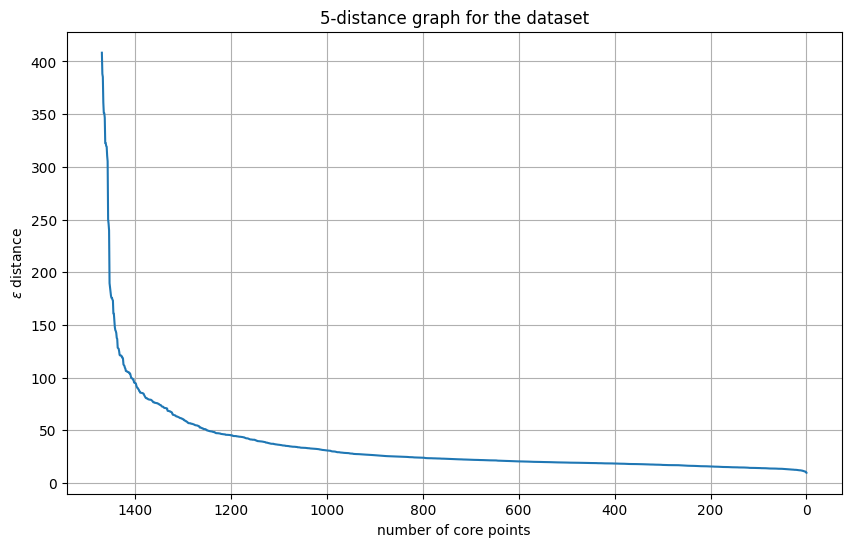

In [27]:
# K distance graph 
# Figure 16
plot_KTHneighbors(data,5)

### 5. Modelling

##### KMeans

In [24]:
# Input K value
K_value = 7

In [25]:
# KMeans model deployment 
km_model = KMeans(n_clusters=K_value, random_state=4)
km_model.fit(fixed)
km_clusters = km_model.predict(fixed) 
# Apply clusters generate by KMeans
Kmeans_df = fixed.copy()
Kmeans_df['cluster'] = km_clusters

##### DBSCAN

In [26]:
# Input eps value
eps = 90

In [27]:
# DBSCAN model deployment 
dbs_model = DBSCAN(eps=eps, min_samples=5) 
dbs_model.fit(fixed) 
dbs_clusters = dbs_model.labels_ 
# Apply clusters generate by KMeans
DBSCAN_df = fixed.copy()
DBSCAN_df['cluster'] = dbs_clusters

### 6. Result of clustering

##### KMeans

Text(0.5, 1.0, 'Percentage of resigned staff clustering by KMeans')

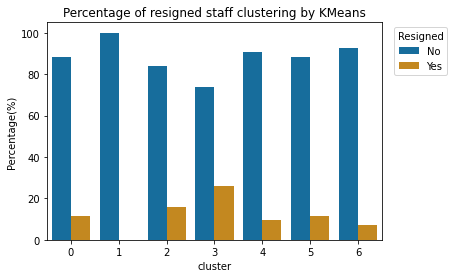

In [28]:
# Result of KMeans
# Figure 17
Resigned_Yes = ((Kmeans_df.groupby(['cluster','Resigned_Yes'])['Resigned_Yes'].count().groupby(level = 0).transform(lambda x: x/x.sum()))*100).reset_index(name = 'Percentage')
Resigned_Yes['Resigned_Yes'].replace(1,'Yes',inplace= True)
Resigned_Yes['Resigned_Yes'].replace(0,'No',inplace= True)
sns.barplot(data=Resigned_Yes, x='cluster', y='Percentage', hue='Resigned_Yes', palette='colorblind')
plt.legend(bbox_to_anchor=(1.02, 1),loc='upper left',title='Resigned')
plt.ylabel('Percentage(%)')
plt.title("Percentage of resigned staff clustering by KMeans")
# plt.savefig('17.jpg')

Text(0.5, 1.0, 'Overtime percentage of staff clustering by KMeans')

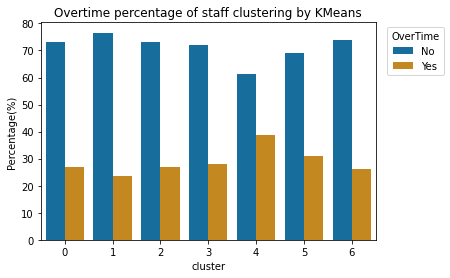

In [29]:
# Figure 18
OverTime_Yes = ((Kmeans_df.groupby(['cluster','OverTime_Yes'])['OverTime_Yes'].count().groupby(level = 0).transform(lambda x: x/x.sum()))*100).reset_index(name = 'Percentage')
OverTime_Yes['OverTime_Yes'].replace(1,'Yes',inplace= True)
OverTime_Yes['OverTime_Yes'].replace(0,'No',inplace= True)
sns.barplot(data=OverTime_Yes, x='cluster', y='Percentage', hue='OverTime_Yes', palette='colorblind')
plt.legend(bbox_to_anchor=(1.02, 1),loc='upper left',title='OverTime')
plt.ylabel('Percentage(%)')
plt.title("Overtime percentage of staff clustering by KMeans")
# plt.savefig('18.jpg')

Text(0.5, 1.0, 'Mean of age clustering by KMeans')

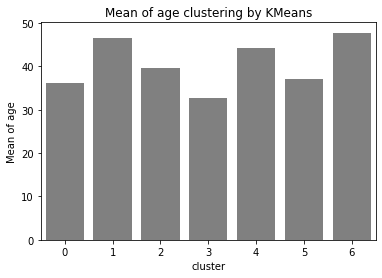

In [30]:
# Figure 19
Age = Kmeans_df.groupby(['cluster'])['Age'].mean().reset_index(name = 'Mean')
sns.barplot(data=Age, x='cluster', y='Mean', hue=None, color='grey')
plt.ylabel('Mean of age')
plt.title("Mean of age clustering by KMeans")
# plt.savefig('19.jpg')

Text(0.5, 1.0, 'Mean of total working years clustering by KMeans')

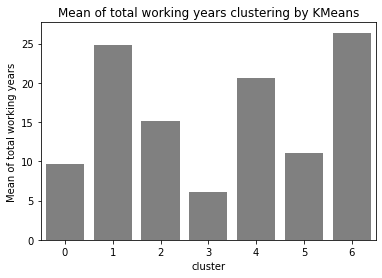

In [31]:
# Figure 20
TotalWorkingYears = Kmeans_df.groupby(['cluster'])['TotalWorkingYears'].mean().reset_index(name = 'Mean')
sns.barplot(data=TotalWorkingYears, x='cluster', y='Mean', hue=None, color='grey')
plt.ylabel('Mean of total working years')
plt.title("Mean of total working years clustering by KMeans")
#plt.savefig('20.jpg')

Text(0.5, 1.0, 'Median of monthly income in gender clustering by KMeans')

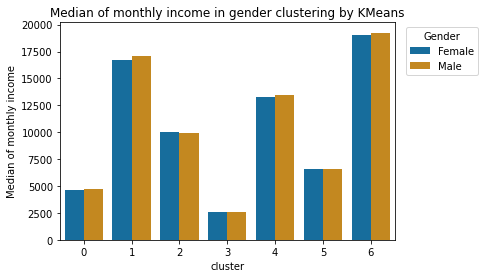

In [32]:
# Figure 21
Genderpaygap = Kmeans_df.groupby(['cluster','Gender_Male'])['MonthlyIncome'].median().reset_index(name = 'Median')
Genderpaygap['Gender_Male'].replace(1,'Male',inplace= True)
Genderpaygap['Gender_Male'].replace(0,'Female',inplace= True)
sns.barplot(data=Genderpaygap, x='cluster', y='Median', hue='Gender_Male', palette='colorblind')
plt.legend(bbox_to_anchor=(1.02, 1),loc='upper left',title='Gender')
plt.ylabel('Median of monthly income')
plt.title("Median of monthly income in gender clustering by KMeans")
#plt.savefig('21.jpg')

Text(0.5, 1.0, 'Resignation status and the median of years since last promotion clustering by KMeans')

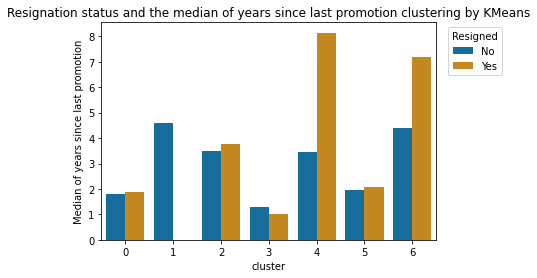

In [33]:
# Figure 22
YearsSinceLastPromotion = Kmeans_df.groupby(['cluster','Resigned_Yes'])['YearsSinceLastPromotion'].mean().reset_index(name = 'Mean')
YearsSinceLastPromotion['Resigned_Yes'].replace(1,'Yes',inplace= True)
YearsSinceLastPromotion['Resigned_Yes'].replace(0,'No',inplace= True)
sns.barplot(data=YearsSinceLastPromotion, x='cluster', y='Mean', hue='Resigned_Yes', palette='colorblind')
plt.legend(bbox_to_anchor=(1.02, 1),loc='upper left',title='Resigned')
plt.ylabel('Median of years since last promotion')
plt.title("Resignation status and the median of years since last promotion clustering by KMeans")
#plt.savefig('22.jpg')

Text(0.5, 1.0, 'Relationship between monthly income and years at company clustering by KMeans')

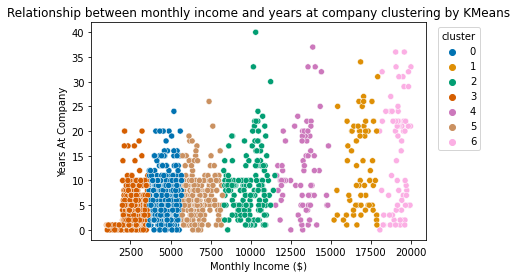

In [34]:
# Figure 23
sns.scatterplot(data=Kmeans_df, x='MonthlyIncome', y='YearsAtCompany', hue='cluster', palette='colorblind')
plt.legend(bbox_to_anchor=(1.02, 1),loc='upper left',title='cluster')
plt.xlabel('Monthly Income ($)')
plt.ylabel('Years At Company')
plt.title("Relationship between monthly income and years at company clustering by KMeans")
#plt.savefig('23.jpg')

Text(0.5, 1.0, 'Relationship between monthly income and average weekly hours worked clustering by KMeans')

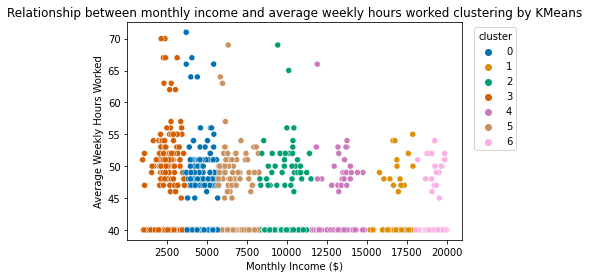

In [35]:
# Figure 24
sns.scatterplot(data=Kmeans_df, x='MonthlyIncome', y='AverageWeeklyHoursWorked', hue='cluster', palette='colorblind')
plt.legend(bbox_to_anchor=(1.02, 1),loc='upper left',title='cluster')
plt.xlabel('Monthly Income ($)')
plt.ylabel('Average Weekly Hours Worked')
plt.title("Relationship between monthly income and average weekly hours worked clustering by KMeans")
#plt.savefig('24.jpg')

Text(0.5, 1.0, 'Mean of work life balance  clustering by KMeans')

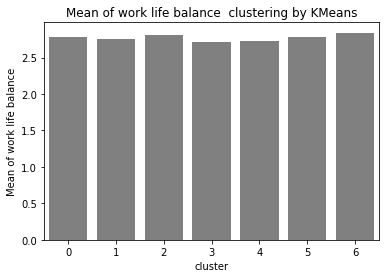

In [36]:
# Figure 25
WorkLifeBalance = Kmeans_df.groupby(['cluster'])['WorkLifeBalance'].mean().reset_index(name = 'Mean')
sns.barplot(data=WorkLifeBalance, x='cluster', y='Mean', hue=None, color='grey')
plt.ylabel('Mean of work life balance')
plt.title("Mean of work life balance  clustering by KMeans")
#plt.savefig('25.jpg')

Text(0.5, 1.0, 'Percentage of gender clustering by KMeans')

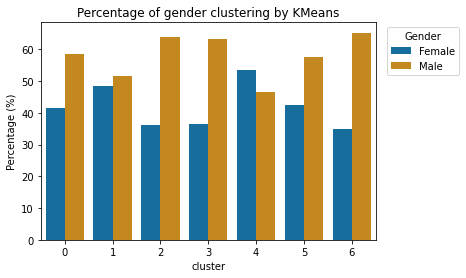

In [37]:
# Figure 26
Gender_Male = ((Kmeans_df.groupby(['cluster','Gender_Male'])['Gender_Male'].count().groupby(level = 0).transform(lambda x: x/x.sum()))*100).reset_index(name = 'Percentage')
Gender_Male['Gender_Male'].replace(1,'Male',inplace= True)
Gender_Male['Gender_Male'].replace(0,'Female',inplace= True)
sns.barplot(data=Gender_Male, x='cluster', y='Percentage', hue='Gender_Male', palette='colorblind')
plt.legend(bbox_to_anchor=(1.02, 1),loc='upper left',title='Gender')
plt.ylabel('Percentage (%)')
plt.title("Percentage of gender clustering by KMeans")
#plt.savefig('26.jpg')

Text(0.5, 1.0, 'Percentage of staff marital status clustering by KMeans')

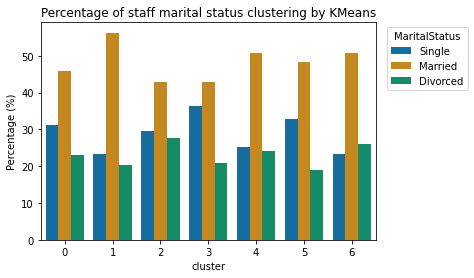

In [38]:
# Figure 27
MaritalStatus = ((Kmeans_df.groupby(['cluster','MaritalStatus'])['MaritalStatus'].count().groupby(level = 0).transform(lambda x: x/x.sum()))*100).reset_index(name = 'Percentage')
MaritalStatus['MaritalStatus'].replace(1,'Single',inplace= True)
MaritalStatus['MaritalStatus'].replace(2,'Married',inplace= True)
MaritalStatus['MaritalStatus'].replace(3,'Divorced',inplace= True)
sns.barplot(data=MaritalStatus, x='cluster', y='Percentage', hue='MaritalStatus', palette='colorblind')
plt.legend(bbox_to_anchor=(1.02, 1),loc='upper left',title='MaritalStatus')
plt.ylabel('Percentage (%)')
plt.title("Percentage of staff marital status clustering by KMeans")
#plt.savefig('27.jpg')

##### DBSCAN

Text(0.5, 1.0, 'Percentage of resigned staff clustering by DBSCAN')

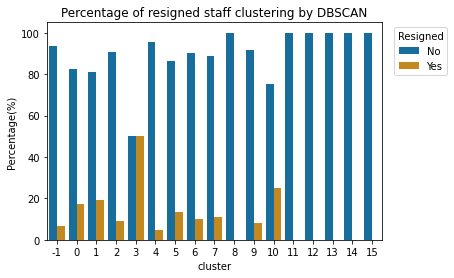

In [39]:
# Result of DBSCAN
# FIgure 28
Resigned_Yes = ((DBSCAN_df.groupby(['cluster','Resigned_Yes'])['Resigned_Yes'].count().groupby(level = 0).transform(lambda x: x/x.sum()))*100).reset_index(name = 'Percentage')
Resigned_Yes['Resigned_Yes'].replace(1,'Yes',inplace= True)
Resigned_Yes['Resigned_Yes'].replace(0,'No',inplace= True)
sns.barplot(data=Resigned_Yes, x='cluster', y='Percentage', hue='Resigned_Yes', palette='colorblind')
plt.legend(bbox_to_anchor=(1.02, 1),loc='upper left',title='Resigned')
plt.ylabel('Percentage(%)')
plt.title("Percentage of resigned staff clustering by DBSCAN")
#plt.savefig('28.jpg')

Text(0.5, 1.0, 'Overtime percentage of staff clustering by DBSCAN')

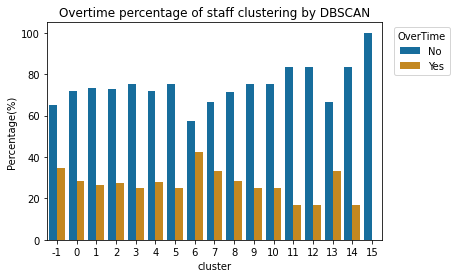

In [40]:
# FIgure 29
OverTime_Yes = ((DBSCAN_df.groupby(['cluster','OverTime_Yes'])['OverTime_Yes'].count().groupby(level = 0).transform(lambda x: x/x.sum()))*100).reset_index(name = 'Percentage')
OverTime_Yes['OverTime_Yes'].replace(1,'Yes',inplace= True)
OverTime_Yes['OverTime_Yes'].replace(0,'No',inplace= True)
sns.barplot(data=OverTime_Yes, x='cluster', y='Percentage', hue='OverTime_Yes', palette='colorblind')
plt.legend(bbox_to_anchor=(1.02, 1),loc='upper left',title='OverTime')
plt.ylabel('Percentage(%)')
plt.title("Overtime percentage of staff clustering by DBSCAN")
#plt.savefig('29.jpg')

Text(0.5, 1.0, 'Mean of age clustering by DBSCAN')

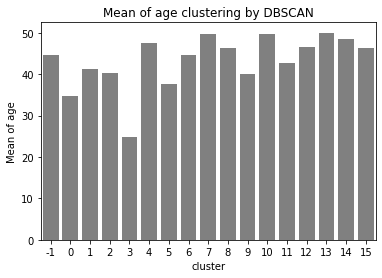

In [41]:
# FIgure 30
Age = DBSCAN_df.groupby(['cluster'])['Age'].mean().reset_index(name = 'Mean')
sns.barplot(data=Age, x='cluster', y='Mean', hue=None, color='grey')
plt.ylabel('Mean of age')
plt.title("Mean of age clustering by DBSCAN")
#plt.savefig('30.jpg')

Text(0.5, 1.0, 'Mean of total working years clustering by DBSCAN')

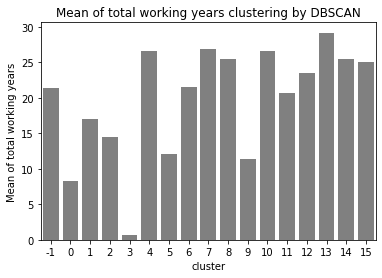

In [42]:
# Figure 31
TotalWorkingYears = DBSCAN_df.groupby(['cluster'])['TotalWorkingYears'].mean().reset_index(name = 'Mean')
sns.barplot(data=TotalWorkingYears, x='cluster', y='Mean', hue=None, color='grey')
plt.ylabel('Mean of total working years')
plt.title("Mean of total working years clustering by DBSCAN")
#plt.savefig('31.jpg')

Text(0.5, 1.0, 'Median of monthly income in gender clustering by DBSCAN')

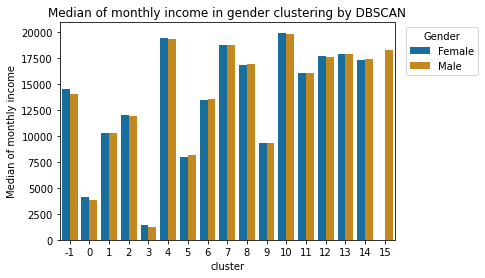

In [43]:
# Figure 32
Genderpaygap = DBSCAN_df.groupby(['cluster','Gender_Male'])['MonthlyIncome'].median().reset_index(name = 'Median')
Genderpaygap['Gender_Male'].replace(1,'Male',inplace= True)
Genderpaygap['Gender_Male'].replace(0,'Female',inplace= True)
sns.barplot(data=Genderpaygap, x='cluster', y='Median', hue='Gender_Male', palette='colorblind')
plt.legend(bbox_to_anchor=(1.02, 1),loc='upper left',title='Gender')
plt.ylabel('Median of monthly income')
plt.title("Median of monthly income in gender clustering by DBSCAN")
#plt.savefig('32.jpg')

Text(0.5, 1.0, 'Resignation status and the median of years since last promotion clustering by DBSCAN')

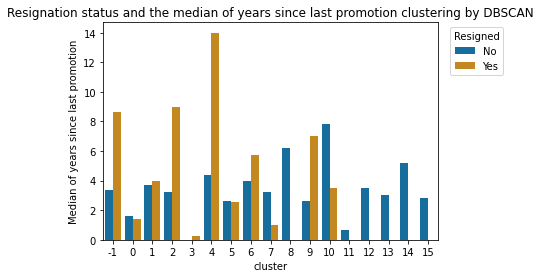

In [44]:
# Figure 33
YearsSinceLastPromotion = DBSCAN_df.groupby(['cluster','Resigned_Yes'])['YearsSinceLastPromotion'].mean().reset_index(name = 'Mean')
YearsSinceLastPromotion['Resigned_Yes'].replace(1,'Yes',inplace= True)
YearsSinceLastPromotion['Resigned_Yes'].replace(0,'No',inplace= True)
sns.barplot(data=YearsSinceLastPromotion, x='cluster', y='Mean', hue='Resigned_Yes', palette='colorblind')
plt.legend(bbox_to_anchor=(1.02, 1),loc='upper left',title='Resigned')
plt.ylabel('Median of years since last promotion')
plt.title("Resignation status and the median of years since last promotion clustering by DBSCAN")
#plt.savefig('33.jpg')

Text(0.5, 1.0, 'Relationship between monthly income and years at company clustering by DBSCAN')

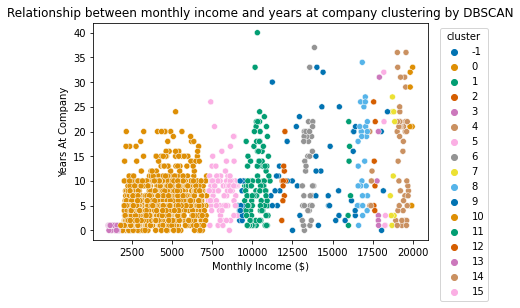

In [45]:
# Figure 34
sns.scatterplot(data=DBSCAN_df, x='MonthlyIncome', y='YearsAtCompany', hue='cluster', palette='colorblind')
plt.legend(bbox_to_anchor=(1.02, 1),loc='upper left',title='cluster')
plt.xlabel('Monthly Income ($)')
plt.ylabel('Years At Company')
plt.title("Relationship between monthly income and years at company clustering by DBSCAN")
#plt.savefig('34.jpg')


Text(0.5, 1.0, 'Relationship between monthly income and average weekly hours worked clustering by DBSCAN')

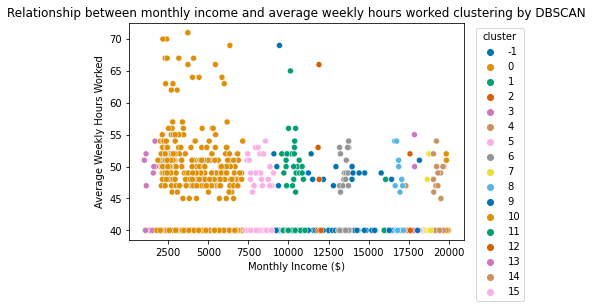

In [46]:
# Figure 35
sns.scatterplot(data=DBSCAN_df, x='MonthlyIncome', y='AverageWeeklyHoursWorked', hue='cluster', palette='colorblind')
plt.legend(bbox_to_anchor=(1.02, 1),loc='upper left',title='cluster')
plt.xlabel('Monthly Income ($)')
plt.ylabel('Average Weekly Hours Worked')
plt.title("Relationship between monthly income and average weekly hours worked clustering by DBSCAN")
#plt.savefig('35.jpg')

Text(0.5, 1.0, 'Mean of work life balance  clustering by DBSCAN')

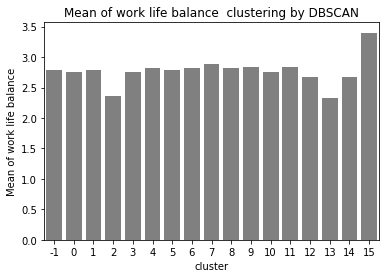

In [47]:
# Figure 36
WorkLifeBalance = DBSCAN_df.groupby(['cluster'])['WorkLifeBalance'].mean().reset_index(name = 'Mean')
sns.barplot(data=WorkLifeBalance, x='cluster', y='Mean', hue=None, color='grey')
plt.ylabel('Mean of work life balance')
plt.title("Mean of work life balance  clustering by DBSCAN")
#plt.savefig('36.jpg')

Text(0.5, 1.0, 'Percentage of staff marital status clustering by DBSCAN')

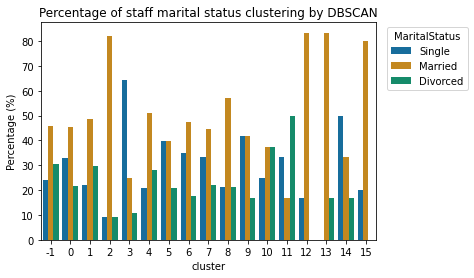

In [48]:
# Figure 37
MaritalStatus = ((DBSCAN_df.groupby(['cluster','MaritalStatus'])['MaritalStatus'].count().groupby(level = 0).transform(lambda x: x/x.sum()))*100).reset_index(name = 'Percentage')
MaritalStatus['MaritalStatus'].replace(1,'Single',inplace= True)
MaritalStatus['MaritalStatus'].replace(2,'Married',inplace= True)
MaritalStatus['MaritalStatus'].replace(3,'Divorced',inplace= True)
sns.barplot(data=MaritalStatus, x='cluster', y='Percentage', hue='MaritalStatus', palette='colorblind')
plt.legend(bbox_to_anchor=(1.02, 1),loc='upper left',title='MaritalStatus')
plt.ylabel('Percentage (%)')
plt.title("Percentage of staff marital status clustering by DBSCAN")
#plt.savefig('37.jpg')

<ipython-input-49-1c497e079d1e>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=Resigned_Year, x='YearsSinceLastPromotion', y='YearsAtCompany', hue=None, palette='colorblind')


Text(0.5, 1.0, 'Relationship between years since the last promotion and years at the company for resigned staff')

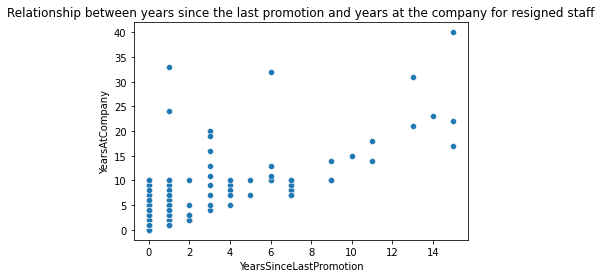

In [49]:
# Figure 38
Resigned_Year = Kmeans_df[Kmeans_df['Resigned_Yes']==1]
sns.scatterplot(data=Resigned_Year, x='YearsSinceLastPromotion', y='YearsAtCompany', hue=None, palette='colorblind')
plt.title("Relationship between years since the last promotion and years at the company for resigned staff")